In [2]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Admin\Downloads\ca-sa\IEA-EV-dataEV salesHistoricalCars.csv")

In [6]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


C:\Users\Admin\AppData\Local\Temp\ipykernel_14340\2836702855.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['predicted_sales'] = model.predict(X)


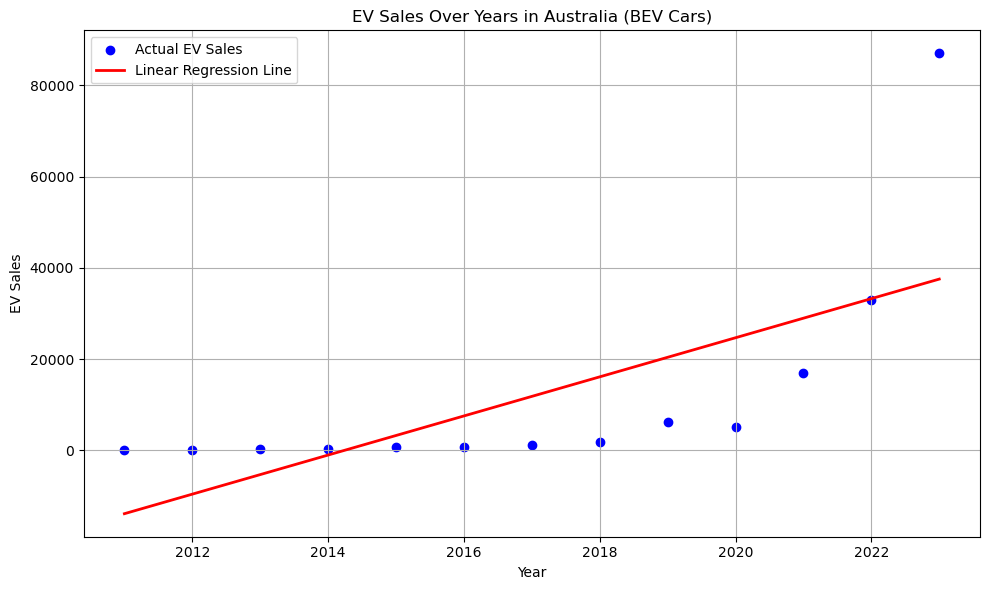

(-8630201.131868128, 4284.593406593405)

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

filtered_df = df[
    (df['parameter'] == 'EV sales') &
    (df['mode'] == 'Cars') &
    (df['powertrain'] == 'BEV') &
    (df['region'] == 'Australia')
]

# Prepare the features and target
X = filtered_df[['year']]
y = filtered_df['value']

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for visualization
filtered_df['predicted_sales'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual EV Sales')
plt.plot(X, filtered_df['predicted_sales'], color='red', linewidth=2, label='Linear Regression Line')
plt.title('EV Sales Over Years in Australia (BEV Cars)')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output model coefficients
model.intercept_, model.coef_[0]